<a href="https://colab.research.google.com/github/caavila96/Colombia_maps_SGR/blob/main/Colombia_map_SGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colombian maps with information about the SGR (Sistema General de Regalías) form Department and Municipality

This notebook is specifically designed to guide users in utilizing shapefiles for map creation and visualization. Shapefiles are a common geospatial data format used to represent geographic features such as boundaries, points, or lines.

Within this notebook, you will find a detailed tutorial that walks you through the process of working with shapefiles effectively. It covers the essential steps of sourcing, loading, and manipulating shapefiles in order to generate informative maps.

By following the instructions provided, you will learn how to access shapefiles containing geographical information related to the Sistema General de Regalías (SGR) in Colombia. These shapefiles can include boundaries of specific regions, administrative divisions, or other relevant geographic features associated with the SGR.

## 1. Libraries



### 1.1 Install libraries

It's necessary to install this libraries:



*   **GeoPandas**: Python library for working with geospatial data, providing data structures and functions for manipulation and visualization of vector data.
*   **wget**: Python library for downloading files from the web programmatically.
*   **contextily**: Python library for easily adding basemaps from web map tile services to geospatial visualizations.
*   **mapclassify**: Python library for classifying spatial data into meaningful groups or categories for thematic mapping.









In [1]:
!pip install geopandas
!pip install wget
!pip install contextily
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=66194c727bcf8017dc8910e6954fd5f0e5f61835b8e1eae1f5988c17c393f04a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.6 MB/s 

### 1.1 Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wget
import geopandas as gpd
from osgeo import gdal
import matplotlib.image as mpimg
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify
import matplotlib.ticker as ticker

## 2 Import the data and the shp files

This chapter is all about importing dataframes and shapefiles, which are like the building blocks of our geospatial analysis. We'll learn how to load data from various file formats, like Excel for dataframes, and shapefiles for the spatial stuff.

### 2.1 Import the shp files

The shapefiles for this project are obtained from the Bureau of Statistics of Colombia (Departamento Administrativo Nacional de Estadística - DANE) through their official website (https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/). To ensure smooth and accurate functioning of the shapefile, it is essential to import the .shp, .shrx, .prj, and .dbf files. These files contain the geometric and attribute information necessary for the correct processing and analysis of the shapefile. By including all these file extensions, we can ensure that our shapefile is complete and ready for further exploration and visualization.

In [4]:
#Permanent link github
base_url = "https://github.com/caavila96/Colombia_maps_SGR/tree/821cbf403027abfb24484c119d60776cdfd7d734/SHAPES/MPIO"

#Urls
shp_url = f"{base_url}/MGN_MPIO_POLITICO.shp"
shx_url = f"{base_url}/MGN_MPIO_POLITICO.shx"
prj_url = f"{base_url}/MGN_MPIO_POLITICO.prj"
dbf_url = f"{base_url}/MGN_MPIO_POLITICO.dbf"


output_dir = "/content/"
shp_file = "MGN_DPTO_POLITICO.shp"
shx_file = "MGN_DPTO_POLITICO.shx"
prj_file = "MGN_DPTO_POLITICO.prj"
dbf_file = "MGN_DPTO_POLITICO.dbf"

#Download
wget.download(shp_url, f"{output_dir}{shp_file}")
wget.download(shx_url, f"{output_dir}{shx_file}")
wget.download(prj_url, f"{output_dir}{prj_file}")
wget.download(dbf_url, f"{output_dir}{dbf_file}")

'/content/MGN_DPTO_POLITICO.dbf'

In [ ]:
shapefile = gpd.read_file("/content/drive/MyDrive/MAPS/MPIO/MGN_MPIO_POLITICO.shp")

In [ ]:
shapefile_path = "/content/MGN_DPTO_POLITICO.shp"
shapefile = gpd.read_file(shapefile_path)

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mpio = gpd.read_file("/content/drive/MyDrive/MAPS/MPIO/MGN_MPIO_POLITICO.shp")
mpio.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


### 2.2 Import the SGR data

In [ ]:
sgr = pd.read_excel("/content/drive/MyDrive/MAPS/Base_Proyectos_15_04_2023.xlsx",sheet_name="Proyectos")
ben = pd.read_excel("/content/drive/MyDrive/MAPS/Localización de la alternativa OCAD PAZ.xlsx")
pdet = pd.read_excel("/content/drive/MyDrive/MAPS/Municipios y subregión PDET.xlsx")

## 3. Clean and transforma the data 

### 3.1 filter the OCAD PAZ project 

In [ ]:
sgr_OCAD = sgr[(sgr['TIPO DE INSTANCIA INICIAL'] == "PAZ") & (sgr["ESTADO DETALLE"] !="DESAPROBADO" )]
sgr_OCAD = sgr_OCAD.convert_dtypes()

ben["BPIN"] = ben["BPIN"].astype("string")

In [ ]:
ben_sgr = ben.merge(sgr_OCAD[["BPIN","SECTOR SUIFP","AVANCE FÍSICO","AVANCE FINANCIERO","VALOR SGR","TOTAL PROYECTO"]], on=["BPIN"], how="inner")

In [ ]:
def mpio_divipola(x):
  if  x > 9999:
    return str(x)
  else:
    return "0" + str(x)

In [ ]:
ben_sgr['Código Municipio'] = ben_sgr['Código Municipio'].apply(mpio_divipola)

In [ ]:
#Transport
ben_sgr["TRANS"] = np.where(ben_sgr["SECTOR SUIFP"] == "TRANSPORTE", 1, 0)
#Education
ben_sgr["EDU"] = np.where(ben_sgr["SECTOR SUIFP"] == "EDUCACIÓN", 1, 0)
#Home
ben_sgr["VIV"] = np.where(ben_sgr["SECTOR SUIFP"] == "VIVIENDA, CIUDAD Y TERRITORIO"  , 1, 0)


In [ ]:
ben_sgr_mpio = ben_sgr.groupby(['Código Municipio']).agg(proyectos = ('BPIN', 'count'), 
                                                 Valor_SGR = ('VALOR SGR', 'sum'),
                                                 Valor_total = ('TOTAL PROYECTO', 'sum'),
                                                 pro_trans = ('TRANS', 'sum'),
                                                 pro_edu = ('EDU', 'sum'),
                                                 pro_viv = ('VIV', 'sum'))
ben_sgr_mpio

,proyectos,Valor_SGR,Valor_total,pro_trans,pro_edu,pro_viv
Código Municipio,,,,,,
05031,1,86331261283.830002,86331261283.830002,1,0,0
05040,2,20390305471.860001,20390305471.860001,0,0,1
05045,6,146499986365.540009,146499986365.540009,3,0,2
05055,1,5078096634.0,5078096634.0,1,0,0
05107,1,5048101703.0,5048101703.0,0,0,1
...,...,...,...,...,...,...
95025,8,192189861288.669983,198669861288.669983,2,0,0
95200,1,5092225567.0,5092225567.0,0,0,0
97001,1,10780712430.35,10780712430.35,1,0,0


In [ ]:
mpio.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


## 4. Merge with the shape file

In [ ]:
mpio_f = mpio.merge(ben_sgr_mpio, left_on=['MPIO_CDPMP'], right_on=['Código Municipio'], how="left")

In [ ]:
mpio_f.head(1)

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry,proyectos,Valor_SGR,Valor_total,pro_trans,pro_edu,pro_viv
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360...",NaN,<NA>,<NA>,NaN,NaN,NaN


In [ ]:
len(mpio_f.groupby("DPTO_CCDGO")["DPTO_CCDGO"].count())

33

### 4.1 Create other shape file for the PDET 

In [ ]:
pdet['Código DANE'] = pdet['Código DANE'].apply(mpio_divipola)
pdet.head(1)

,No.,Código DANE,Departamento,Municipio,SUBREGIÓN PDET
0,1,05031,ANTIOQUIA,AMALFI,BAJO CAUCA Y NORDESTE ANTIOQUEÑO


In [ ]:
prueba = ben_sgr_mpio.merge(pdet, left_on=['Código Municipio'], right_on=['Código DANE'], how="inner")
prueba

,proyectos,Valor_SGR,Valor_total,pro_trans,pro_edu,pro_viv,No.,Código DANE,Departamento,Municipio,SUBREGIÓN PDET
0,1,86331261283.830002,86331261283.830002,1,0,0,1,05031,ANTIOQUIA,AMALFI,BAJO CAUCA Y NORDESTE ANTIOQUEÑO
1,2,20390305471.860001,20390305471.860001,0,0,1,2,05040,ANTIOQUIA,ANORÍ,BAJO CAUCA Y NORDESTE ANTIOQUEÑO
2,6,146499986365.540009,146499986365.540009,3,0,2,3,05045,ANTIOQUIA,APARTADÓ,URABÁ ANTIOQUEÑO
3,1,5048101703.0,5048101703.0,0,0,1,4,05107,ANTIOQUIA,BRICEÑO,BAJO CAUCA Y NORDESTE ANTIOQUEÑO
4,3,44471041176.0,44471041176.0,1,0,0,5,05120,ANTIOQUIA,CÁCERES,BAJO CAUCA Y NORDESTE ANTIOQUEÑO
...,...,...,...,...,...,...,...,...,...,...,...
163,5,66341205364.919998,66341205364.919998,2,0,0,155,86885,PUTUMAYO,VILLAGARZÓN,PUTUMAYO
164,8,163770975253.380005,170323932956.390015,3,1,2,106,95001,GUAVIARE,SAN JOSÉ DEL GUAVIARE,MACARENA - GUAVIARE
165,5,75731367696.0,82211367696.0,0,0,2,103,95015,GUAVIARE,CALAMAR,MACARENA - GUAVIARE
166,8,192189861288.669983,198669861288.669983,2,0,0,104,95025,GUAVIARE,EL RETORNO,MACARENA - GUAVIARE


In [ ]:
pdet[~pdet["Código DANE"].isin(prueba["Código DANE"])]

,No.,Código DANE,Departamento,Municipio,SUBREGIÓN PDET
10,11,05361,ANTIOQUIA,ITUANGO,BAJO CAUCA Y NORDESTE ANTIOQUEÑO
89,90,27250,CHOCÓ,EL LITORAL DEL SAN JUAN,CHOCÓ


In [ ]:
pdet = mpio.merge(pdet, left_on=['MPIO_CDPMP'], right_on=['Código DANE'], how="inner")

170

In [ ]:
pdet.groupby(["SUBREGIÓN PDET"])["SUBREGIÓN PDET"].count()

SUBREGIÓN PDET
ALTO PATÍA Y NORTE DEL CAUCA                24
ARAUCA                                       4
BAJO CAUCA Y NORDESTE ANTIOQUEÑO            13
CATATUMBO                                    8
CHOCÓ                                       14
CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO    17
MACARENA - GUAVIARE                         12
MONTES DE MARÍA                             15
PACÍFICO MEDIO                               4
PACÍFICO Y FRONTERA NARIÑENSE               11
PUTUMAYO                                     9
SIERRA NEVADA - PERIJÁ - ZONA BANANERA      15
SUR DE BOLÍVAR                               7
SUR DE CÓRDOBA                               5
SUR DEL TOLIMA                               4
URABÁ ANTIOQUEÑO                             8
Name: SUBREGIÓN PDET, dtype: int64

In [ ]:
# Create a new GeoDataFrame to store the grouped polygons
pdet_zona = pdet[['SUBREGIÓN PDET', 'geometry']]

# Assuming your data is stored in a GeoDataFrame called "gdf"
grouped_data = pdet.groupby('SUBREGIÓN PDET')

# Initialize a counter
counter = 1

# Iterate over the groups
for group_name, group_df in grouped_data:
    # Concatenate the polygons of the current group
    group_polygon = gpd.GeoSeries(group_df['geometry']).unary_union
    
    # Create a new row with the counter, group name, and the grouped polygon
    pdet_zona = pdet_zona.append({'Group_ID': counter, 'SUBREGIÓN PDET': group_name, 'geometry': group_polygon}, ignore_index=True)
    
    # Increment the counter
    counter += 1

# Filter out the duplicate groups
pdet_zona = pdet_zona[pdet_zona['Group_ID'].notnull()]


<ipython-input-160-643f87579db2>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdet_zona = pdet_zona.append({'Group_ID': counter, 'SUBREGIÓN PDET': group_name, 'geometry': group_polygon}, ignore_index=True)
<ipython-input-160-643f87579db2>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdet_zona = pdet_zona.append({'Group_ID': counter, 'SUBREGIÓN PDET': group_name, 'geometry': group_polygon}, ignore_index=True)
<ipython-input-160-643f87579db2>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdet_zona = pdet_zona.append({'Group_ID': counter, 'SUBREGIÓN PDET': group_name, 'geometry': group_polygon}, ignore_index=True)
<ipython-input-160-643f87579db2>:16: FutureWarning: The frame.append method is deprecated and will b

In [ ]:
pdet_zona

,SUBREGIÓN PDET,geometry,Group_ID
170,ALTO PATÍA Y NORTE DEL CAUCA,"POLYGON ((-77.73782 1.86906, -77.73742 1.86908...",1.0
171,ARAUCA,"POLYGON ((-71.31557 6.54881, -71.29026 6.52588...",2.0
172,BAJO CAUCA Y NORDESTE ANTIOQUEÑO,"MULTIPOLYGON (((-74.83798 6.99184, -74.83798 6...",3.0
173,CATATUMBO,"POLYGON ((-72.60290 8.32237, -72.60299 8.32224...",4.0
174,CHOCÓ,"MULTIPOLYGON (((-77.30381 4.56720, -77.30394 4...",5.0
175,CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO,"POLYGON ((-75.48444 0.78316, -75.48485 0.78321...",6.0
176,MACARENA - GUAVIARE,"POLYGON ((-73.65999 1.62079, -73.66202 1.62266...",7.0
177,MONTES DE MARÍA,"MULTIPOLYGON (((-75.61100 9.40679, -75.61065 9...",8.0
178,PACÍFICO MEDIO,"MULTIPOLYGON (((-77.40220 2.38123, -77.40161 2...",9.0
179,PACÍFICO Y FRONTERA NARIÑENSE,"MULTIPOLYGON (((-78.88979 1.50986, -78.88978 1...",10.0


In [ ]:
sgr_pdet = sgr_OCAD.groupby(['Consolidado PDET']).agg(proyectos = ('BPIN', 'count'), 
                                                 Valor_SGR = ('VALOR SGR', 'sum'),
                                                 Valor_total = ('TOTAL PROYECTO', 'sum'))
sgr_pdet = sgr_pdet.reset_index()

In [ ]:
sgr_pdet

,Consolidado PDET,proyectos,Valor_SGR,Valor_total
0,ALTO PATÍA Y NORTE DEL CAUCA,53,658571310977.050049,658635908641.050049
1,ARAUCA,25,291557715604.26001,301014912547.26001
2,BAJO CAUCA Y NORDESTE ANTIOQUEÑO,19,211128211665.290009,211128211665.290009
3,CATATUMBO,32,228901846275.070007,229328914896.670013
4,CHOCÓ,40,354663139303.650024,356662799081.650024
5,CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO,68,604197706930.060059,604870086412.459961
6,MACARENA - GUAVIARE,49,628849598027.01001,635402555730.02002
7,MONTES DE MARÍA,48,599759365226.849976,602630779078.559937
8,PACÍFICO MEDIO,1,334307938835.0,334307938835.0
9,PACÍFICO Y FRONTERA NARIÑENSE,18,137563742047.380005,137563742047.380005


In [ ]:
pdet_f = pdet_zona.merge(sgr_pdet, left_on=['SUBREGIÓN PDET'], right_on=['Consolidado PDET'], how="inner")
pdet_f

,SUBREGIÓN PDET,geometry,Group_ID,Consolidado PDET,proyectos,Valor_SGR,Valor_total
0,ALTO PATÍA Y NORTE DEL CAUCA,"POLYGON ((-77.73782 1.86906, -77.73742 1.86908...",1.0,ALTO PATÍA Y NORTE DEL CAUCA,53,658571310977.050049,658635908641.050049
1,ARAUCA,"POLYGON ((-71.31557 6.54881, -71.29026 6.52588...",2.0,ARAUCA,25,291557715604.26001,301014912547.26001
2,BAJO CAUCA Y NORDESTE ANTIOQUEÑO,"MULTIPOLYGON (((-74.83798 6.99184, -74.83798 6...",3.0,BAJO CAUCA Y NORDESTE ANTIOQUEÑO,19,211128211665.290009,211128211665.290009
3,CATATUMBO,"POLYGON ((-72.60290 8.32237, -72.60299 8.32224...",4.0,CATATUMBO,32,228901846275.070007,229328914896.670013
4,CHOCÓ,"MULTIPOLYGON (((-77.30381 4.56720, -77.30394 4...",5.0,CHOCÓ,40,354663139303.650024,356662799081.650024
5,CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO,"POLYGON ((-75.48444 0.78316, -75.48485 0.78321...",6.0,CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO,68,604197706930.060059,604870086412.459961
6,MACARENA - GUAVIARE,"POLYGON ((-73.65999 1.62079, -73.66202 1.62266...",7.0,MACARENA - GUAVIARE,49,628849598027.01001,635402555730.02002
7,MONTES DE MARÍA,"MULTIPOLYGON (((-75.61100 9.40679, -75.61065 9...",8.0,MONTES DE MARÍA,48,599759365226.849976,602630779078.559937
8,PACÍFICO MEDIO,"MULTIPOLYGON (((-77.40220 2.38123, -77.40161 2...",9.0,PACÍFICO MEDIO,1,334307938835.0,334307938835.0
9,PACÍFICO Y FRONTERA NARIÑENSE,"MULTIPOLYGON (((-78.88979 1.50986, -78.88978 1...",10.0,PACÍFICO Y FRONTERA NARIÑENSE,18,137563742047.380005,137563742047.380005


# Create the maps

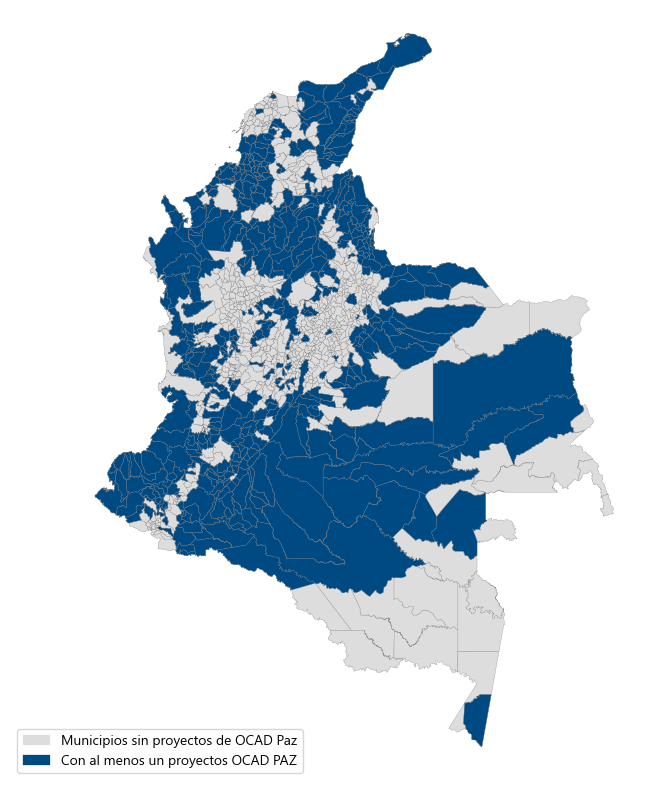

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Original plot
mpio_f.plot(ax=ax, color="#DDDDDD", edgecolor="#7F7F7F", linewidth=0.2)

# Filtered plot
mpio_filtered = mpio_f[mpio_f[['proyectos']].notnull().all(1)]
mpio_filtered.plot(ax=ax, color="#004A84", edgecolor="#7F7F7F", linewidth=0.2)

# Set the limits for the x-axis and y-axis
xmin, xmax = -81, -66  # Example values, adjust as needed
ymin, ymax = -5, 13    # Example values, adjust as needed
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


# Remove the frame
ax.axis('off')

# Set the title
font_path = '/content/drive/MyDrive/MAPS/SEGOEUI.TTF'
#title_font = fm.FontProperties(fname=font_path, size=20)
#ax.set_title('Municipios con proyectos OCAD PAZ', fontproperties=title_font)

# Custom legend handles and labels
handles = [mpatches.Rectangle((0, 0), 1, 1, color="#DDDDDD", linewidth=0.2),
           mpatches.Rectangle((0, 0), 1, 1, color="#004A84", linewidth=0.2)]
labels = ['Municipios sin proyectos de OCAD Paz', 'Con al menos un proyectos OCAD PAZ']

# Add legend
ax.legend(handles, labels, fontsize=15, prop=fm.FontProperties(fname=font_path),loc = 'lower left')

plt.savefig('/content/drive/MyDrive/MAPS/Mapa1.png', dpi=300)

plt.show()

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


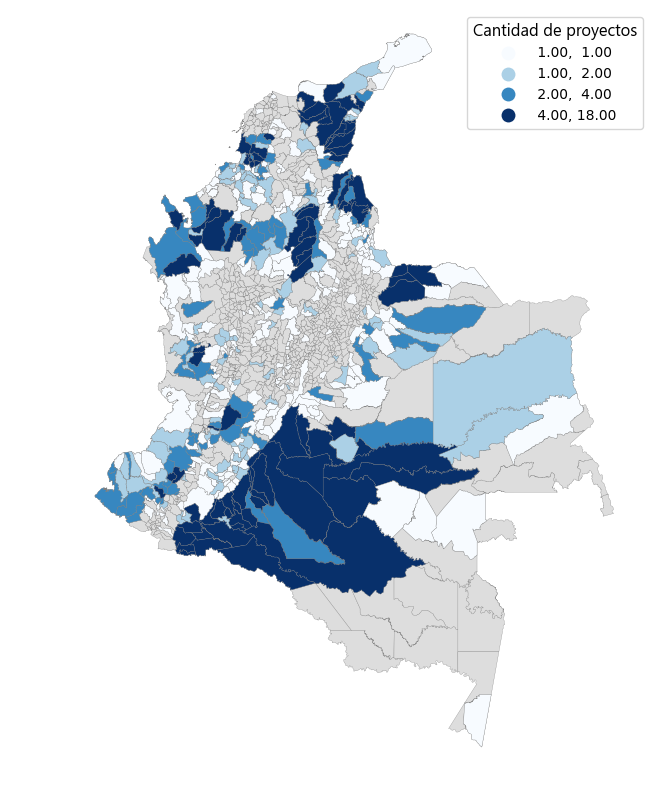

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Original plot
mpio_f.plot(ax=ax, color="#DDDDDD", edgecolor="#7F7F7F", linewidth=0.2)


# Convert column to float
mpio_f['proyectos'] = mpio_f['proyectos'].astype(float)



# Filtered plot
mpio_filtered = mpio_f[mpio_f['proyectos'].notna()]
mpio_filtered.plot(ax=ax, column="proyectos",  edgecolor="#7F7F7F",scheme="quantiles", k=5,  cmap='Blues', linewidth=0.2,legend=True)

# Set the limits for the x-axis and y-axis
xmin, xmax = -81, -66  # Example values, adjust as needed
ymin, ymax = -5, 13    # Example values, adjust as needed
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


# Remove the frame
ax.axis('off')

# Set the title
font_path = '/content/drive/MyDrive/MAPS/SEGOEUI.TTF'

# Set the legend font size and title
legend_font = fm.FontProperties(fname=font_path, size=12)
legend = ax.get_legend()
legend.set_title('Cantidad de proyectos', prop=legend_font)


#plt.savefig("/content/drive/MyDrive/MAPS/Mapa2.png", dpi=300)

plt.show()

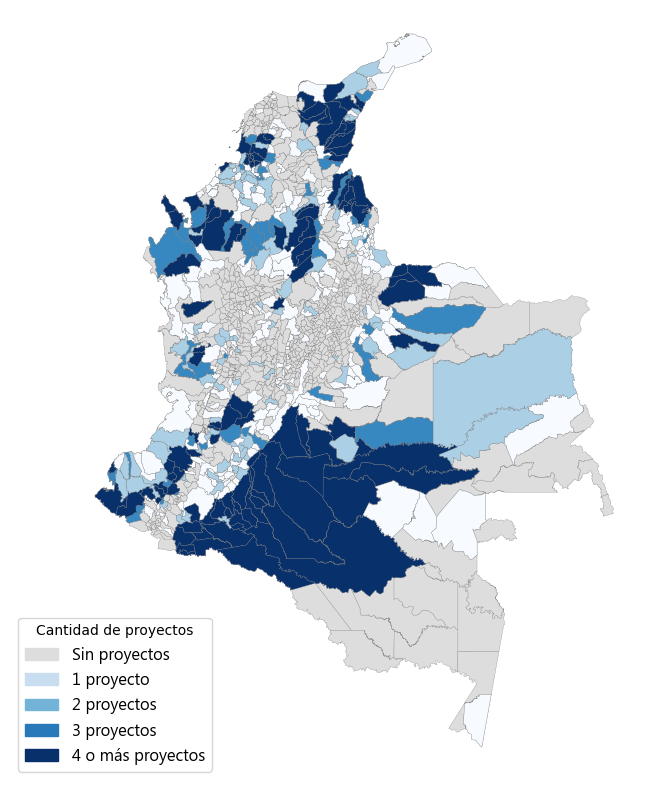

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Original plot
mpio_f.plot(ax=ax, color="#DDDDDD", edgecolor="#7F7F7F", linewidth=0.2)

# Convert column to float
mpio_f['proyectos'] = mpio_f['proyectos'].astype(float)

# Filtered plot
mpio_filtered = mpio_f[mpio_f['proyectos'].notna()]
mpio_filtered.plot(ax=ax, column="proyectos", edgecolor="#7F7F7F", scheme="quantiles", k=4, cmap='Blues', linewidth=0.2, legend=True)

# Set the limits for the x-axis and y-axis
xmin, xmax = -81, -66  # Example values, adjust as needed
ymin, ymax = -5, 13    # Example values, adjust as needed
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Remove the frame
ax.axis('off')

# Set the title
font_path = '/content/drive/MyDrive/MAPS/SEGOEUI.TTF'

# Set the legend font size and title
legend_font = fm.FontProperties(fname=font_path, size=12)
legend = ax.get_legend()
legend.set_title('Cantidad de proyectos', prop=legend_font)

# Manually set the legend labels
legend_labels = ['Sin proyectos','1 proyecto', '2 proyectos', '3 proyectos', '4 o más proyectos',]



# Create custom legend handles
handles = [
    mpatches.Patch(color='#DDDDDD', label='Sin proyectos'),
    mpatches.Patch(color='#c8ddf0', label='1 proyecto'),
    mpatches.Patch(color='#73b3d8', label='2 proyectos'),
    mpatches.Patch(color='#2879b9', label='3 y 4 proyectos'),
    mpatches.Patch(color='#08306b', label='4 o más proyectos')
]

# Create the legend
ax.legend(handles=handles, labels=legend_labels, title='Cantidad de proyectos', prop=legend_font, loc='lower left')



plt.savefig("/content/drive/MyDrive/MAPS/Mapa2.png", dpi=300)

plt.show()

In [ ]:
pdet_f.head(1)

,SUBREGIÓN PDET,geometry,Group_ID,Consolidado PDET,proyectos,Valor_SGR,Valor_total
0,ALTO PATÍA Y NORTE DEL CAUCA,"POLYGON ((-77.73782 1.86906, -77.73742 1.86908...",1.0,ALTO PATÍA Y NORTE DEL CAUCA,53,658571310977.050049,658635908641.050049


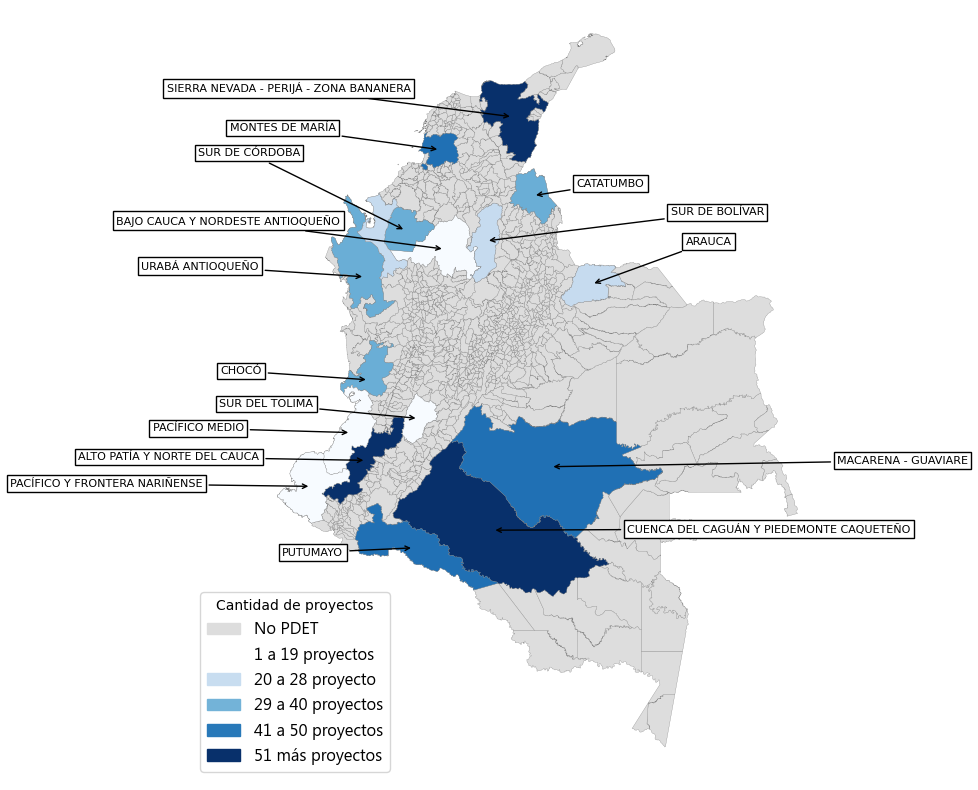

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Original plot
mpio_f.plot(ax=ax, color="#DDDDDD", edgecolor="#7F7F7F", linewidth=0.2)

# Convert column to float
mpio_f['proyectos'] = mpio_f['proyectos'].astype(float)

# Filtered plot
pdet_f.plot(ax=ax, column="proyectos", edgecolor="#7F7F7F", scheme="quantiles", cmap='Blues', linewidth=0.2, legend=True)

# Set the limits for the x-axis and y-axis
xmin, xmax = -81, -66  # Example values, adjust as needed
ymin, ymax = -5, 13    # Example values, adjust as needed
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Remove the frame
ax.axis('off')

# Set the title
font_path = '/content/drive/MyDrive/MAPS/SEGOEUI.TTF'

# Set the legend font size and title
legend_font = fm.FontProperties(fname=font_path, size=12)
legend = ax.get_legend()
legend.set_title('Cantidad de proyectos', prop=legend_font)

# Manually set the legend labels
legend_labels = ['No PDET','1 a 19 proyectos', '20 a 28 proyecto', '29 a 40 proyectos', '41 a 50 proyectos','51 más proyectos']



# Create custom legend handles
handles = [
    mpatches.Patch(color='#DDDDDD', label='No PDET'),
    mpatches.Patch(color='white', label='1 a 19 proyectos'),
    mpatches.Patch(color='#c8ddf0', label='20 a 28 proyecto'),
    mpatches.Patch(color='#73b3d8', label='29 a 40 proyectos'),
    mpatches.Patch(color='#2879b9', label='41 a 50 proyectos'),
    mpatches.Patch(color='#08306b', label='51 más proyectos')]


label_coords = [
    (-76.92981459387657, 2.4720571144362515),
    (100.65893867280485, 30.589171375154691),
    (-75.09815327435761, 20.410203814125608),
    (80.02445453304297, 8.662181136789474),
    (-76.97301267499479, 6.2548357740927125),
    (300.97468484413628, 0.8401308850180914),
    (300.61889566078821, 4.3236548063754534),
    (-75.20445120811299, 15.733766807143848),
    (-77.28399779661851, 3.1213692985388732),
    (-78.21617532689535, 1.864950369732305),
    (-50.81719321058857, -3.42752919792165905),
    (-73.50620158866086, 20.503189185948589),
    (200.1234167455573, 20.602271376799547),
    (-76.00620699162904, 55.8436674912549735),
    (-75.7098824261642, 10.4524855210449674),
    (-76.55933826842767, 7.762274228387536)
]





label_coords = [(float(x), float(y)) for x, y in label_coords]


label_texts = pdet_f['SUBREGIÓN PDET']  # Keep the same labels as before



# Add labels for the regions with squares and arrows
for coords, label in zip(label_coords, label_texts):
    x, y = coords
    if label == "CHOCÓ":
      centroid_x, centroid_y = (-76.87301267499479, 4.3548357740927125)
    elif label == "URABÁ ANTIOQUEÑO":
      centroid_x, centroid_y = (-76.95933826842767, 6.762274228387536)
    else:
      centroid = pdet_f[pdet_f['SUBREGIÓN PDET'] == label].centroid.iloc[0]
      centroid_x, centroid_y = centroid.x, centroid.y
    ax.annotate(label, (centroid_x, centroid_y), xytext=(x, y), textcoords="offset points", fontsize=8, ha='right', va='center',
                bbox=dict(boxstyle='square', facecolor='white', edgecolor='black'),
                arrowprops=dict(arrowstyle='->'))
    
# Display the legend with custom handles and labels
ax.legend(handles=handles, labels=legend_labels, prop=legend_font,title='Cantidad de proyectos' ,loc='lower left')

plt.savefig("/content/drive/MyDrive/MAPS/Mapa3.png", dpi=300)

plt.show()

In [ ]:
centroid = pdet_f[pdet_f['SUBREGIÓN PDET'] == "URABÁ ANTIOQUEÑO"].centroid.iloc[0]
centroid.x, centroid.y

(-76.55933826842767, 7.762274228387536)

In [ ]:
list(zip(pdet_f.centroid.x, pdet_f.centroid.y, pdet_f['SUBREGIÓN PDET']))

[(-76.92981459387657, 2.4720571144362515, 'ALTO PATÍA Y NORTE DEL CAUCA'),
 (-71.65893867280485, 6.589171375154691, 'ARAUCA'),
 (-75.09815327435761, 7.410203814125608, 'BAJO CAUCA Y NORDESTE ANTIOQUEÑO'),
 (-73.02445453304297, 8.662181136789474, 'CATATUMBO'),
 (-76.97301267499479, 6.2548357740927125, 'CHOCÓ'),
 (-73.97468484413628,
  0.8401308850180914,
  'CUENCA DEL CAGUÁN Y PIEDEMONTE CAQUETEÑO'),
 (-72.61889566078821, 2.3236548063754534, 'MACARENA - GUAVIARE'),
 (-75.20445120811299, 9.733766807143848, 'MONTES DE MARÍA'),
 (-77.28399779661851, 3.1213692985388732, 'PACÍFICO MEDIO'),
 (-78.21617532689535, 1.864950369732305, 'PACÍFICO Y FRONTERA NARIÑENSE'),
 (-75.81719321058857, 0.42752919792165905, 'PUTUMAYO'),
 (-73.50620158866086,
  10.503189185948589,
  'SIERRA NEVADA - PERIJÁ - ZONA BANANERA'),
 (-74.1234167455573, 7.602271376799547, 'SUR DE BOLÍVAR'),
 (-76.00620699162904, 7.8436674912549735, 'SUR DE CÓRDOBA'),
 (-75.7098824261642, 3.4524855210449674, 'SUR DEL TOLIMA'),
 (-76.559

In [ ]:
centroid_x, centroid_y = pdet_f.centroid.x, pdet_f.centroid.y
arrow_coords = centroid_x, centroid_y

In [ ]:
arrow_coords

(0    -76.929815
 1    -71.658939
 2    -75.098153
 3    -73.024455
 4    -76.973013
 5    -73.974685
 6    -72.618896
 7    -75.204451
 8    -77.283998
 9    -78.216175
 10   -75.817193
 11   -73.506202
 12   -74.123417
 13   -76.006207
 14   -75.709882
 15   -76.559338
 dtype: float64,
 0      2.472057
 1      6.589171
 2      7.410204
 3      8.662181
 4      6.254836
 5      0.840131
 6      2.323655
 7      9.733767
 8      3.121369
 9      1.864950
 10     0.427529
 11    10.503189
 12     7.602271
 13     7.843667
 14     3.452486
 15     7.762274
 dtype: float64)

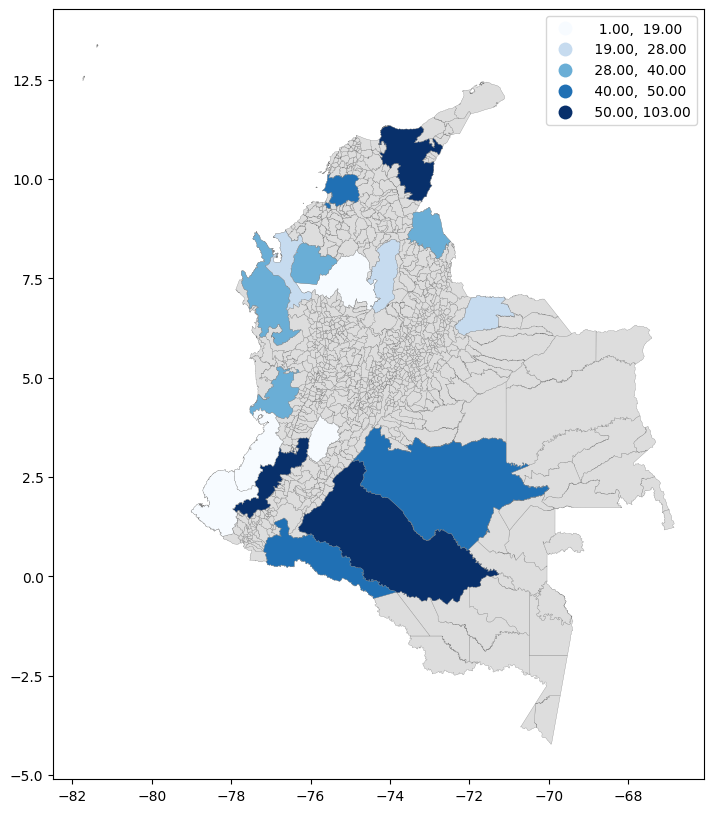

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Original plot
mpio_f.plot(ax=ax, color="#DDDDDD", edgecolor="#7F7F7F", linewidth=0.2)

# Convert column to float
mpio_f['proyectos'] = mpio_f['proyectos'].astype(float)

# Filtered plot
pdet_f.plot(ax=ax, column="proyectos", edgecolor="#7F7F7F", scheme="quantiles", cmap='Blues', linewidth=0.2, legend=True)

plt.show()

In [ ]:


# Create the Blues colormap
blues_cmap = plt.cm.get_cmap('Blues')

# Get five colors from the colormap
num_colors = 5
segmentdata = blues_cmap._segmentdata
colors_list = [segmentdata['rgb'][i][:3] for i in range(len(segmentdata['rgb']))][:num_colors]

# Convert colors to hexadecimal format
hex_colors = [plt.colors.rgb2hex(color) for color in colors_list]

# Print the hexadecimal colors
print(hex_colors)

<ipython-input-183-79122fc362e7>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues_cmap = plt.cm.get_cmap('Blues')


KeyError: ignored

In [ ]:
colors_list

array([[0.96862745, 0.98431373, 1.        , 1.        ],
       [0.96555171, 0.98234525, 0.99901576, 1.        ],
       [0.96247597, 0.98037678, 0.99803153, 1.        ],
       [0.95940023, 0.9784083 , 0.99704729, 1.        ],
       [0.95632449, 0.97643983, 0.99606305, 1.        ]])